In [25]:
import CircuitGenerate
from CircuitGenerate import QuantumCircuitRC
from RandomCompiling import RandomCompile
import matplotlib.pyplot as plt
import numpy as np

q0: ──X────DC(p=1/10)────ADC(γ=1/10)────PDC(γ=1/10)────M(q0)──
      │
q1: ──●────DC(p=1/10)────ADC(γ=1/10)────PDC(γ=1/10)────M(q1)──
q0: ──Y────X────DC(p=1/10)────ADC(γ=1/10)────PDC(γ=1/10)────Y────M(q0)──
           │
q1: ──I────●────DC(p=1/10)────ADC(γ=1/10)────PDC(γ=1/10)────Z────M(q1)──


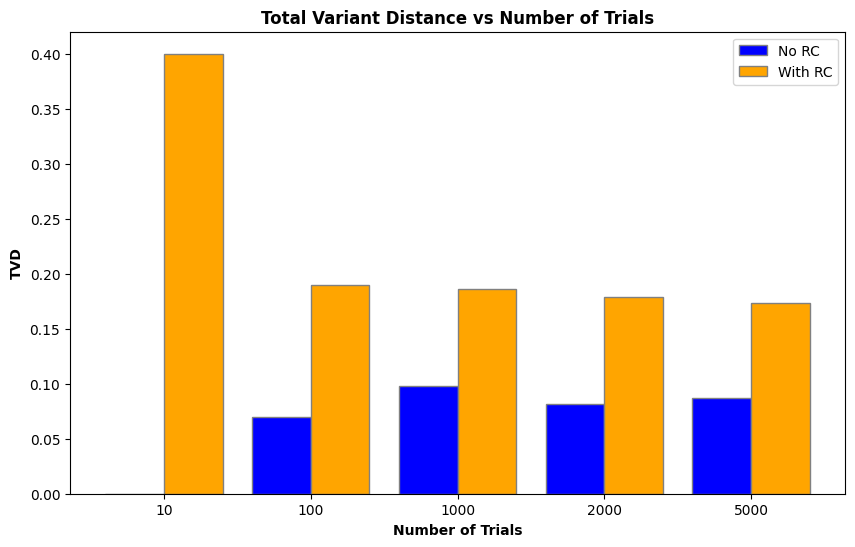

In [26]:
trials = [10, 100, 1000, 2000, 5000]
no_RC_fidelity = []
RC_fidelity = []

for i in range(len(trials)):
    qc_RC = QuantumCircuitRC.test_single_unit(num_trials=trials[i])
    no_RC, with_RC = RandomCompile.Fidelity_Evaluation(qc_RC.ideal_prob_list, qc_RC.ideal_circuit_noise_prob_list, qc_RC.trials_prob_list)
    no_RC_fidelity.append(no_RC)
    RC_fidelity.append(with_RC)

print(qc_RC.ideal_circuit_noise.circuit)
print(qc_RC.trials_qc_gate_list[0].circuit)

# plot the histogram of the two fidelities for different number of trials
bar_width = 0.4

# Set the positions of the bars on the x-axis
r1 = np.arange(len(trials))
r2 = [x + bar_width for x in r1]

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(r1, no_RC_fidelity, color='blue', width=bar_width, edgecolor='grey', label='No RC')
plt.bar(r2, RC_fidelity, color='orange', width=bar_width, edgecolor='grey', label='With RC')

# Add labels and title
plt.xlabel('Number of Trials', fontweight='bold')
plt.ylabel('TVD', fontweight='bold')
plt.title('Total Variant Distance vs Number of Trials', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(trials))], trials)

# Add legend
plt.legend()

# Show the plot
plt.show()

In [27]:
print(qc_RC.ideal_prob_list)
print(qc_RC.ideal_circuit_noise_prob_list)
print(qc_RC.trials_prob_list)

[1.0, 0.0, 0.0, 0.0]
[0.913, 0.0422, 0.0416, 0.0032]
[0.8266, 0.0796, 0.0868, 0.007]
